## Polynomial Regression

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

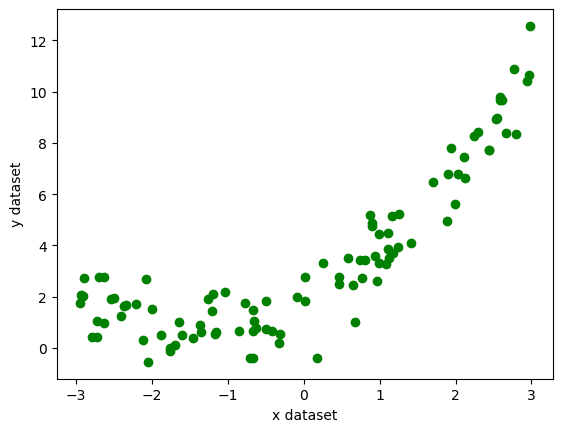

In [100]:
x = 6 * np.random.rand(100,1) - 3
y = 0.5 * x**2 + 1.5*x + 2 + np.random.randn(100,1)  ## quad eq used in y
plt.scatter(x,y,c='g')
plt.xlabel("x dataset")
plt.ylabel("y dataset")
plt.show()

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [102]:
## lets implement simple linear regression
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()
regression_1.fit(x_train,y_train)

LinearRegression()

In [103]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression_1.predict(x_test))
print(score)

0.6956833103113608


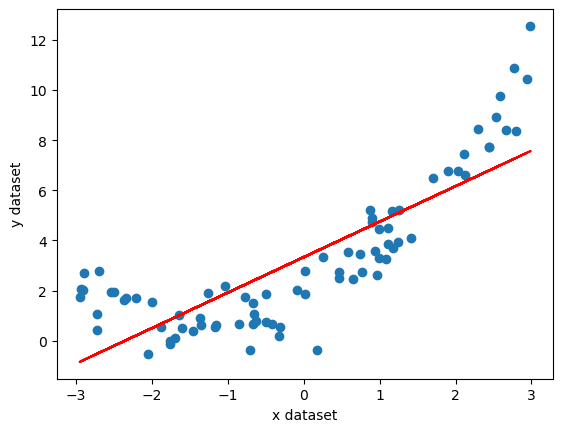

In [104]:
## lets visualize this model
plt.plot(x_train,regression_1.predict(x_train),color = 'r')
plt.scatter(x_train,y_train)
plt.xlabel("x dataset")
plt.ylabel("y dataset")
plt.show()

In [105]:
 # lets apply polynomial tranformation 
from sklearn.preprocessing import PolynomialFeatures


In [106]:
poly = PolynomialFeatures(degree=2,include_bias=True)

In [107]:
x_train_poly  = poly.fit_transform(x_train)
x_test_poly  = poly.transform(x_test)

In [108]:
x_train_poly

array([[ 1.00000000e+00,  1.40923238e+00,  1.98593591e+00],
       [ 1.00000000e+00, -3.21952481e-01,  1.03653400e-01],
       [ 1.00000000e+00, -1.25197266e+00,  1.56743554e+00],
       [ 1.00000000e+00, -2.90589276e+00,  8.44421275e+00],
       [ 1.00000000e+00,  9.43643343e-01,  8.90462759e-01],
       [ 1.00000000e+00, -1.63670575e+00,  2.67880572e+00],
       [ 1.00000000e+00, -1.60456366e+00,  2.57462454e+00],
       [ 1.00000000e+00,  2.50553338e-01,  6.27769750e-02],
       [ 1.00000000e+00, -2.72474178e+00,  7.42421775e+00],
       [ 1.00000000e+00, -2.34162572e+00,  5.48321102e+00],
       [ 1.00000000e+00,  4.72581406e-01,  2.23333186e-01],
       [ 1.00000000e+00,  5.86951775e-01,  3.44512386e-01],
       [ 1.00000000e+00,  1.10813807e+00,  1.22796998e+00],
       [ 1.00000000e+00,  1.24963682e+00,  1.56159219e+00],
       [ 1.00000000e+00,  1.90541859e+00,  3.63061999e+00],
       [ 1.00000000e+00,  2.01478904e-02,  4.05937486e-04],
       [ 1.00000000e+00, -1.36180338e+00

In [109]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred = regression.predict(x_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.9157299655105021


In [110]:
print(regression.coef_)

[[0.         1.47914178 0.53257355]]


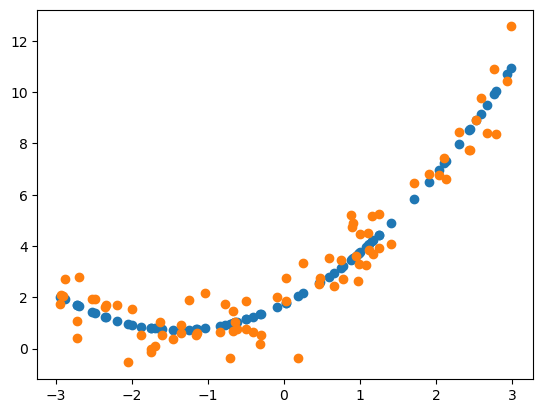

In [111]:

plt.scatter(x_train,regression.predict(x_train_poly))
plt.scatter(x_train,y_train)
plt.show()

In [112]:
## predication of new data
x_new =np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)

In [113]:
x_new_poly


array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

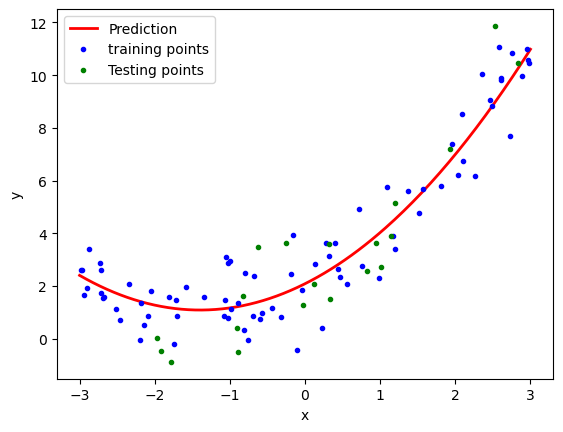

In [98]:
y_new = regression.predict(x_new_poly)
plt.plot(x_new,y_new,'r-',linewidth =2,label ='Prediction')
plt.plot(x_train,y_train,'b.',label="training points")
plt.plot(x_test,y_test,'g.',label="Testing points")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# pipeline concept

In [118]:
from sklearn.pipeline import Pipeline
def poly_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)
    X_new_ploy=poly.transform(X_new)
    poly_feature=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_feature",poly_feature),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train)
    Y_pred_new=poly_regression.predict(X_new)
    ##poltting predicted line
    plt.plot(X_new,Y_pred_new,'r',label="Degree"+str(degree),linewidth=2)
    plt.plot(x_train,y_train,"b.",linewidth=3)
    plt.plot(x_test,y_test,"g.",linewidth=3)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend(loc="upper left")
    
    plt.axis([-4,4,0,10])
    plt.show()

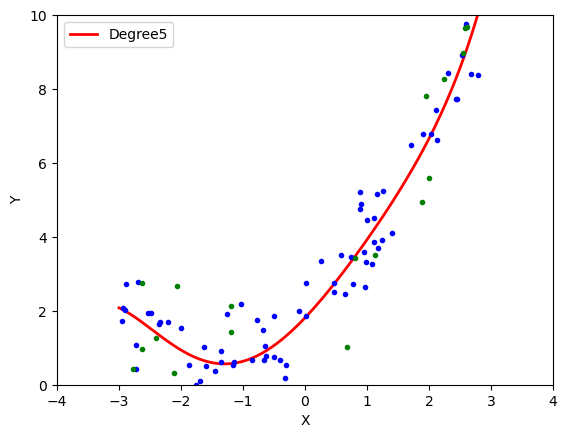

In [119]:
poly_regression(5)